# Analisis de los factores del indice de felicidad en 2019

El proposito de este archivo es demostrar el uso de las plataformas de visualización de python (Pandas, Matplotlib, Seaborn) para analizar como se estructura el estudio de la felicidad a través del mundo.

Histograma de calificacion de felicidad en 2019 , mostrando en que parte se ubica mexico.

Text(6.595, 0.2, 'MEX')

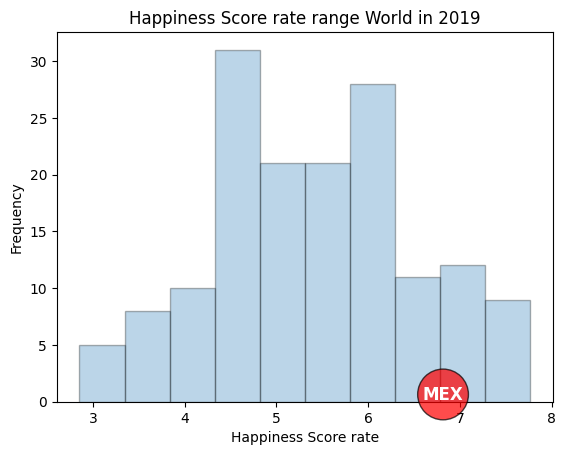

In [3]:
#Importar librerias de Python - Pandas,Matplotlib, Seaborn, Numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

# Crear un dataframe con los datos de Mexico
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico

# Obtener un histograma del puntaje (score) para identificar el rango más frecuente
happiness['Score'].plot(kind='hist', edgecolor= 'black', alpha=0.3)
plt.title('Happiness Score rate range World in 2019')
plt.xlabel('Happiness Score rate')

mexico_score = mexico['Score'].values[0]
mexico_score

#Agregar el texto al histograma con valor de mexico
props_bbox = {'boxstyle': 'circle',
              'facecolor' : 'red',
              'alpha' : 0.7}
plt.text(mexico_score,0.2,'MEX',weight='bold',color='white',fontsize='12', bbox = props_bbox)



Boxplot de expectativa de vida del mundo en el 2019; mostrando a Mexico

Text(1.2, 0.961, 'MEX')

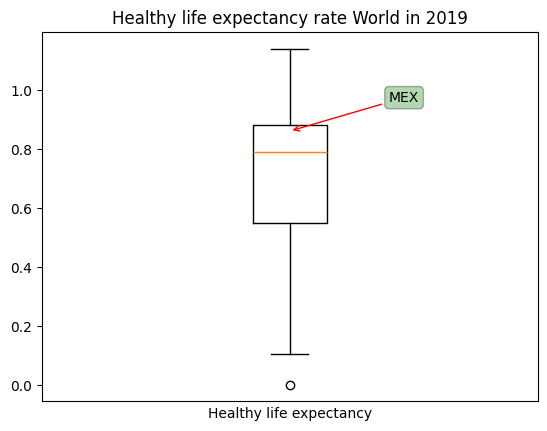

In [233]:
# Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness.set_index('Country or region', inplace=True)

# Crear un dataframe con los datos de Mexico
mexico = happiness[happiness.index=='Mexico']
mexico

#Obtener un boxplot para la columna esperanza de vida (Healthy life expectancy)

plt.boxplot(happiness['Healthy life expectancy'])
plt.title('Healthy life expectancy rate World in 2019')
plt.xlabel('Healthy life expectancy')
plt.xticks([])

# Personalizar etiqueta de texto con flecha
props_adict ={'arrowstyle':'->',
              'color': 'red'}
props_bdict ={'boxstyle':'round',
              'facecolor': 'green',
              'alpha': 0.3}

# Posicionar la etiqueta
pos = happiness.loc[happiness.index == 'Mexico','Healthy life expectancy'].values[0]
pos

plt.annotate('MEX', xy=(1,pos), xytext=(1.2, pos+0.1), arrowprops=props_adict, bbox= props_bdict)



Grafica de pastel con la representación de cada factor para el indice de felciidad de Mexico

Text(0.5, 1.0, 'Mexico Happiness Factors %')

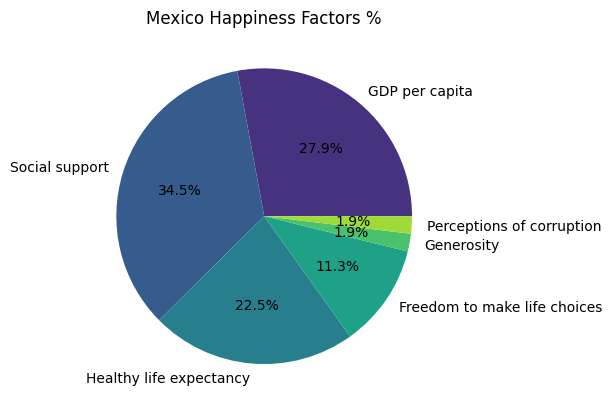

In [11]:

#Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

#Crear un dataframe con los datos de Mexico
mexico = happiness[happiness['Country or region']=='Mexico'].copy()
mexico.set_index('Country or region',inplace=True)
mexico.drop(['Overall rank', 'Score'], axis=1, inplace= True)
mexico = mexico.T
mexico['Percentage'] = (mexico['Mexico']/ mexico['Mexico'].sum())*100
mexico

# Graficar la representación de cada indice en grafica de barras
colors = sns.color_palette('viridis', len(mexico['Percentage']))

plt.pie(mexico['Percentage'].round(2),autopct='%1.1f%%' ,colors=colors, labels= mexico.index)
plt.title("Mexico Happiness Factors %")

Gráfica de barras comparando los 6 factores entre 5 paises diferentes

Text(0.5, 1.0, 'Happiness factor for countries in 2019 ranked by highest happines rate')

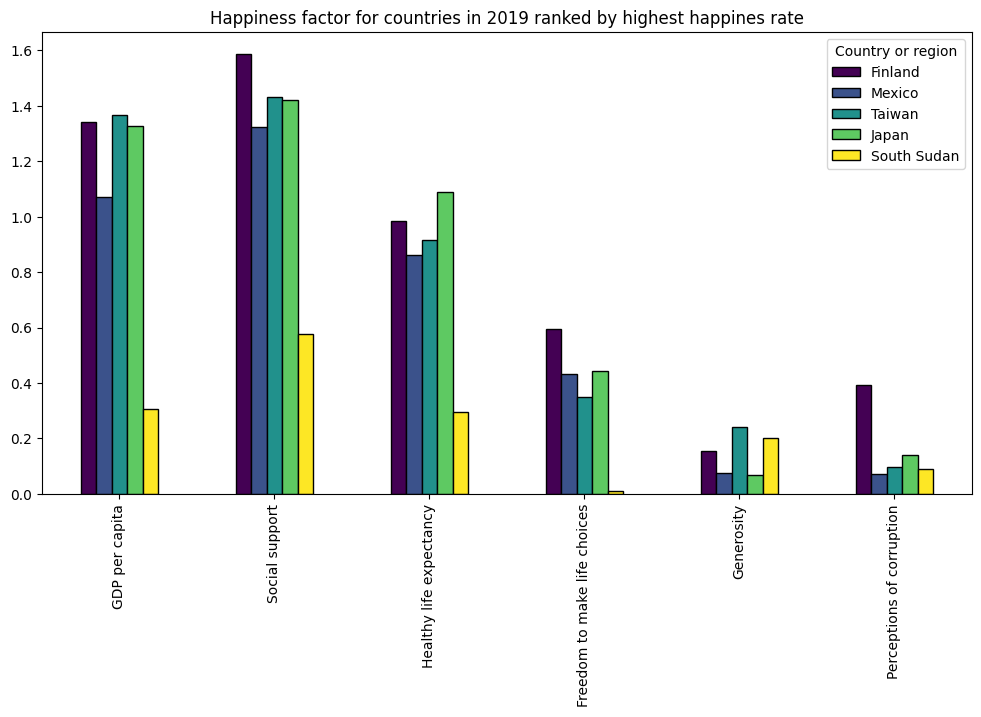

In [9]:

#Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

# Filtra el dataframe para tener 5 paises ( el mas feliz, el menos feliz, Mexico y dos mas)

df_world = happiness[(happiness['Score']==happiness['Score'].max())|
                     (happiness['Score']== happiness['Score'].min())|
                     (happiness['Country or region']== 'Mexico')|
                     (happiness['Country or region']== 'Taiwan')|
                     (happiness['Country or region']== 'Japan')]
#Colocar como indice el nombre del pais
df_world = df_world.sort_values(by='Score', ascending=False)
df_world.set_index('Country or region', inplace=True)
df_world.drop(['Overall rank', 'Score'], inplace = True, axis= 1)

#Graficar los seis factores por cada pais seleccionado

df_world.T.plot(kind='bar',figsize=(12,6), edgecolor= 'black', colormap='viridis')
plt.title('Happiness factor for countries in 2019 ranked by highest happines rate')






Subgraficas de dispersión comparando la correlación de la califación de felicidad con cada factor

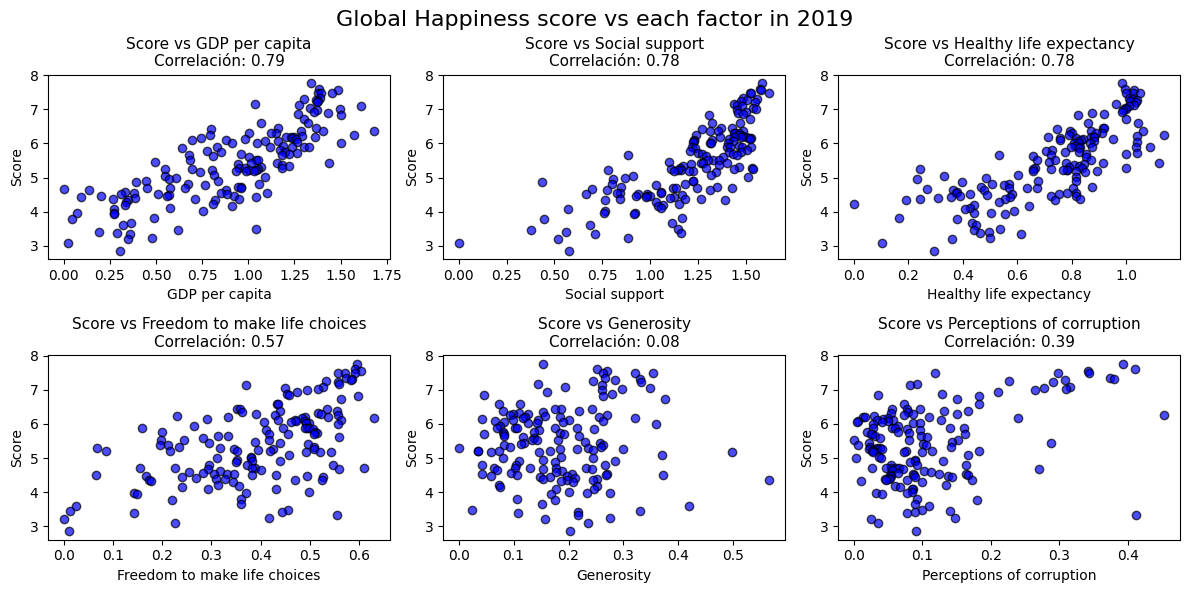

In [235]:

#Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

factors = ["GDP per capita", "Social support", "Healthy life expectancy",
           "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

# Crear una matriz de subgrafica de 2 x 3 con scatte plots del puntaje score versus cada uno de los 6 factores
fig,axs =plt.subplots(2,3, figsize=(12,6))

# Iterar sobre cada factor y graficar en las subgráficas
for i, factor in enumerate(factors):
    row, col = divmod(i, 3)  # Para ubicar la subgráfica en la matriz 2x3
    ax = axs[row, col]  # Seleccionamos el eje correspondiente

    # Graficar cada factor contra el Score
    ax.scatter(happiness[factor], happiness["Score"], alpha=0.7, color='blue', edgecolors='black')

    # Calcular la correlación de Pearson entre el factor y Score
    correlation = np.corrcoef(happiness[factor], happiness["Score"])[0, 1]

    # Etiquetas y título
    ax.set_xlabel(factor, fontsize=10)
    ax.set_ylabel("Score", fontsize=10)
    ax.set_title(f"Score vs {factor}\nCorrelación: {correlation:.2f}", fontsize=11)


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Evita que el título principal se sobreponga
plt.suptitle('Global Happiness score vs each factor in 2019', fontsize=16)
plt.show()

Mapa de calor con la correlación de los factores de felicidad

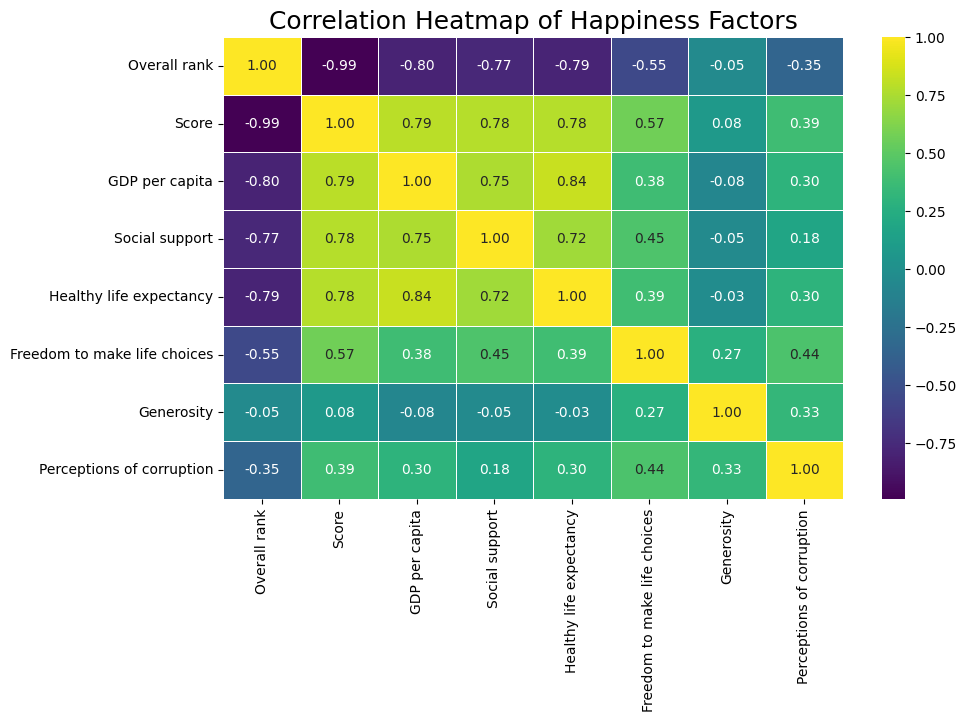

In [5]:

#Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

happiness.set_index('Country or region', inplace=True)


# Calcular la matriz de correlación
correlation_matrix = happiness.corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Agregar título
plt.title('Correlation Heatmap of Happiness Factors', fontsize=18)

#Mostrar grafico
plt.show()

Gráfica de barras con el promedio de felicidad por región

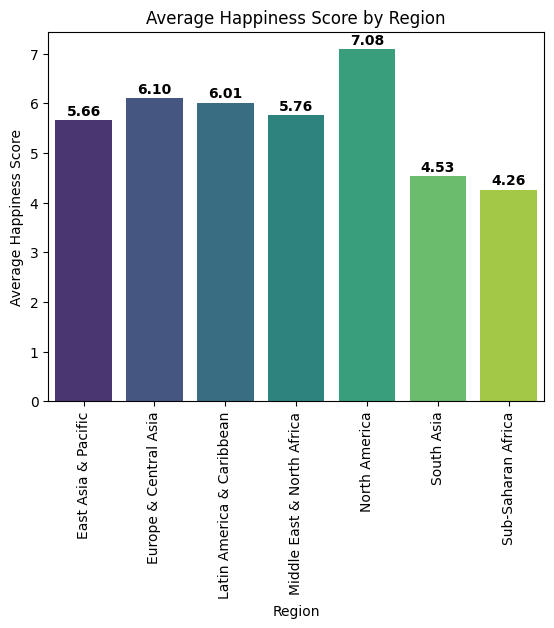

In [6]:

# Subir el dataframe Happines_reporte.csv como happiness
happiness = pd.read_csv('/content/0.rw6r6mdtjng0.9sxn8dzeqsbHappiness_report.csv')
happiness

# Subir el dataframe metadata.csv como metadata
metadata = pd.read_csv('/content/0.9ep3krj7s1o0.ona2jvufk4mMetadata.csv')

#Editar ambos dataframes para que tengan indices similares
happiness.set_index('Country or region', inplace=True)
happiness.index.name = 'Country'

metadata.set_index('TableName', inplace=True)
metadata.index.name = 'Country'

# Juntar ambos dataframes por medio del indice
df_merge = pd.merge(happiness, metadata, on='Country', how='left')
region_score = df_merge.groupby('Region')['Score'].mean()
region_score.rename('Avg Happines Score', inplace=True)

# Hacer grafico de barras para demostrar el promedio por cada region
colors = sns.color_palette('viridis', len(region_score))

sns.barplot(x=region_score.index, y=region_score.values, palette=colors, hue= region_score.index)
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Region')
plt.xticks(rotation=90)

# Agregar los valores a la grafica
for i, value in enumerate(region_score.values):
  plt.text(i, value + 0.1, f'{value:.2f}', ha='center', fontsize=10, weight='bold')
